异常检测实战task：
1. 基于 anomaly_data.csv数据，可视化数据分布情况、及其对应高斯分布的概率密度函数
2. 建立模型，实现异常数据点预测
3. 可视化异常检测处理结果
4. 修改概率分布阈值EllipticEnvelope(contamination=0.1)中的contamination，查看阈值改变对结果的影响

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('anomaly_data.csv')
data.head()

,x1,x2
0,8.046815,9.741152
1,8.408520,8.763270
2,9.195915,10.853181
3,9.914701,11.174260
4,8.576700,9.042849


In [2]:
# define x1 and x2
x1 = data.loc[:, 'x1']
x2 = data.loc[:, 'x2']

x1.head(), x2.head()

(0    8.046815
 1    8.408520
 2    9.195915
 3    9.914701
 4    8.576700
 Name: x1, dtype: float64,
 0     9.741152
 1     8.763270
 2    10.853181
 3    11.174260
 4     9.042849
 Name: x2, dtype: float64)

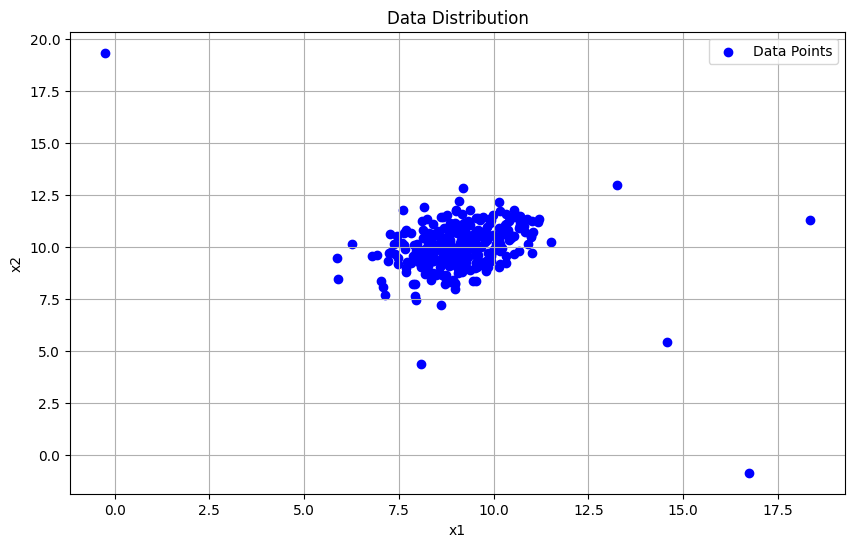

In [3]:
# Visualize the data distribution
plt.figure(figsize=(10, 6))
plt.scatter(x1, x2, c='blue', label='Data Points')
plt.title('Data Distribution')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid()
plt.show()

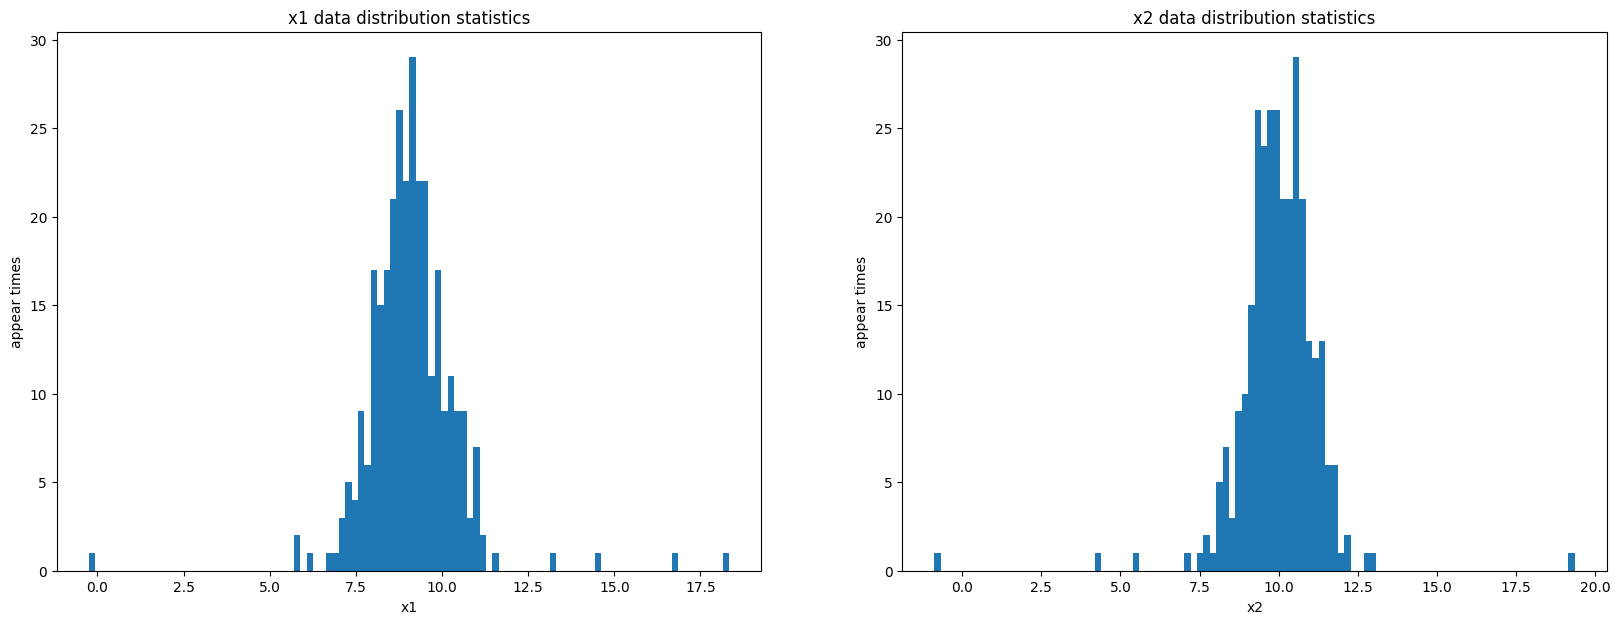

In [4]:

import matplotlib as mlp
fig2 = plt.figure(figsize=(20,7))
plt.subplot(121)
plt.hist(x1,bins=100) 
plt.title('x1 data distribution statistics')
plt.xlabel('x1')
plt.ylabel('appear times')
plt.subplot(122)
plt.hist(x2,bins=100) 
plt.title('x2 data distribution statistics')
plt.xlabel('x2')
plt.ylabel('appear times')
plt.show()


In [5]:
# Calculate the mean and standard deviation of x1 and x2
x1_mean = x1.mean()
x1_sigma = x1.std()
x2_mean = x2.mean()
x2_sigma = x2.std()
print(x1_mean,x1_sigma,x2_mean,x2_sigma)


9.112225783931596 1.3559573758220915 9.997710507954398 1.30970711753864


In [6]:
# Calculate the Gaussian distribution for x1 and x2
from scipy.stats import norm
x1_range = np.linspace(0,20,300) # From 0 to 20, with 300 points
x1_normal = norm.pdf(x1_range,x1_mean,x1_sigma) # Calculate the normal distribution for x1
x2_range = np.linspace(0,20,300)
x2_normal = norm.pdf(x2_range,x2_mean,x2_sigma)


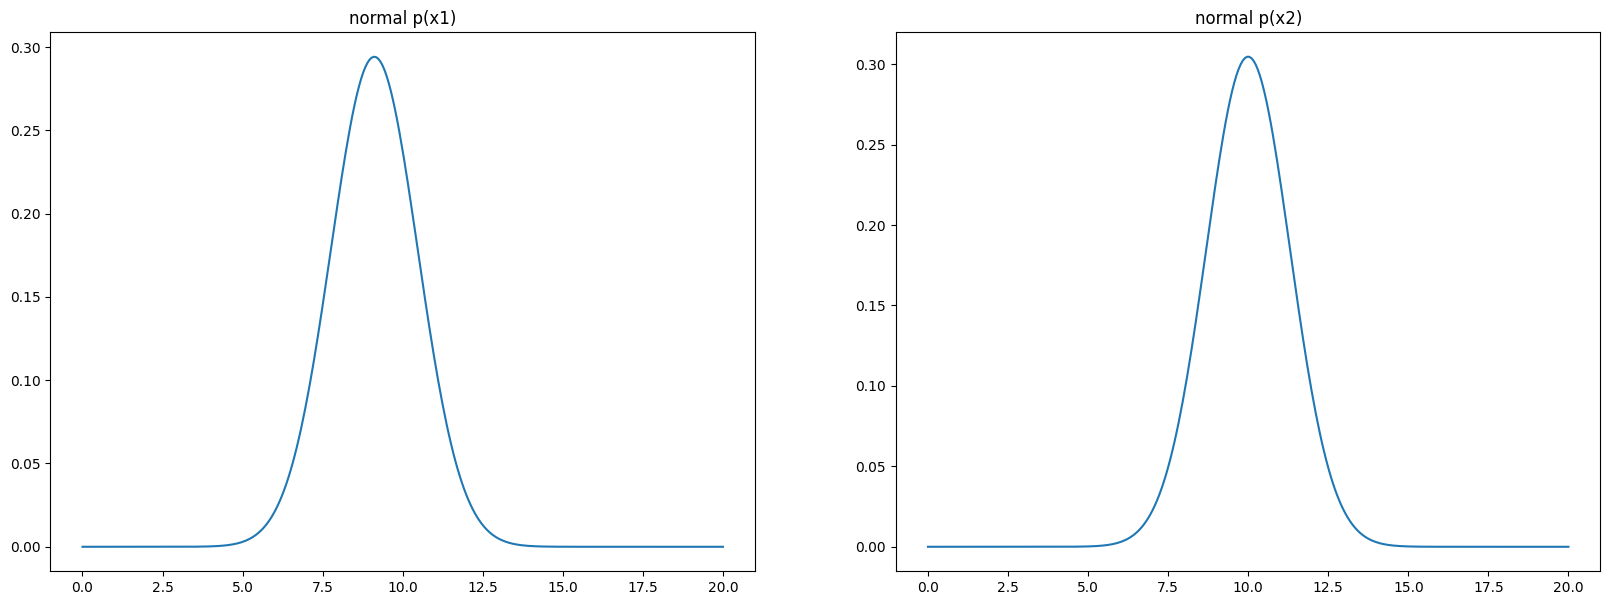

In [7]:
# Visualize the Gaussian distribution for x1 and x2
fig3 = plt.figure(figsize=(20,7))
plt.subplot(121)
plt.plot(x1_range,x1_normal)
plt.title('normal p(x1)')
plt.subplot(122)
plt.plot(x2_range,x2_normal)
plt.title('normal p(x2)')
plt.show()


In [8]:
# Establish and train the model
from sklearn.covariance import EllipticEnvelope
ad_model = EllipticEnvelope()
ad_model.fit(data)


,store_precision,True
,assume_centered,False
,support_fraction,None
,contamination,0.1
,random_state,None


In [9]:
# predict
y_predict = ad_model.predict(data)
print(pd.value_counts(y_predict))


 1    276
-1     31
Name: count, dtype: int64


C:\Users\njbj1210\AppData\Local\Temp\ipykernel_2248\2715604733.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(y_predict))


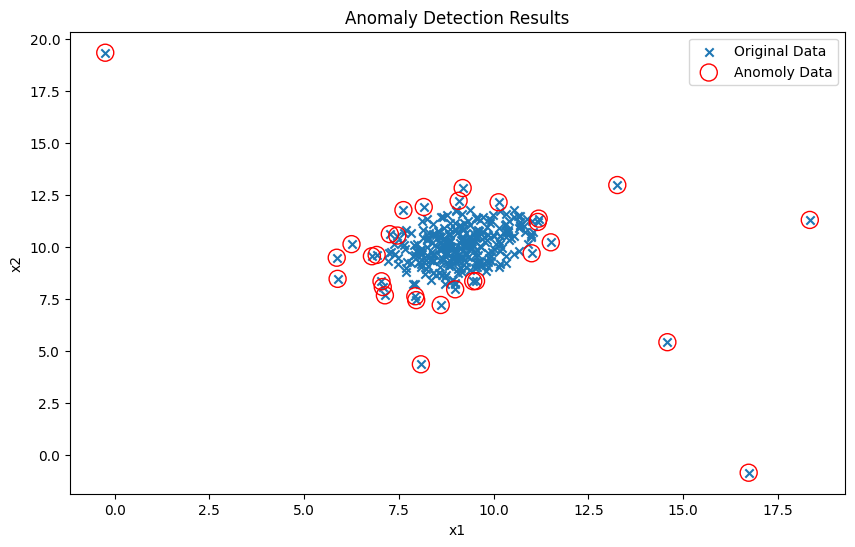

In [10]:
# Visualize the results
fig4 = plt.figure(figsize=(10,6))
orginal_data=plt.scatter(data.loc[:,'x1'],data.loc[:,'x2'],marker='x') 
anomaly_data=plt.scatter(data.loc[:,'x1'][y_predict==-1],data.loc[:,'x2'][y_predict==-1],marker='o',facecolor='none',edgecolor='red',s=150)

plt.title('Anomaly Detection Results')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend((orginal_data,anomaly_data),('Original Data','Anomoly Data'),loc='upper right')
plt.show()


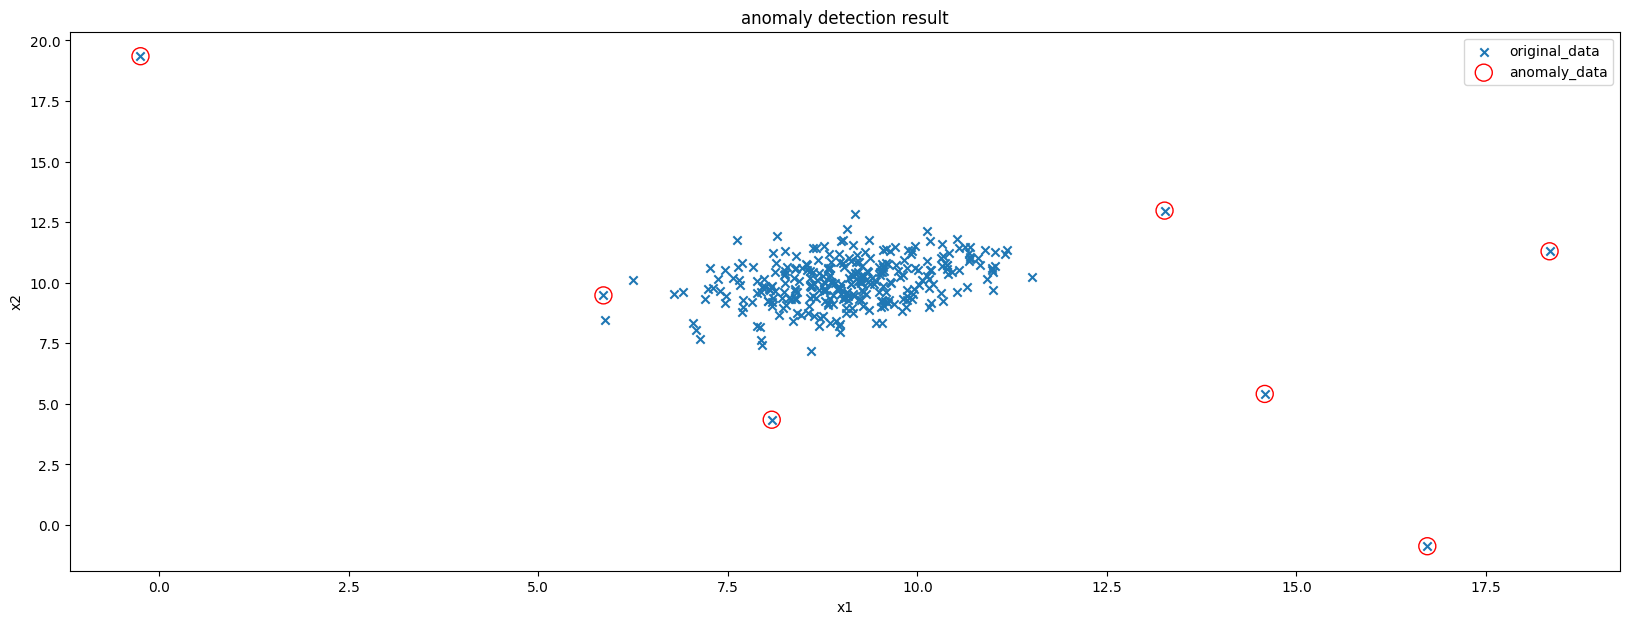

In [11]:
# Change the contamination parameter to detect more anomalies
ad_model = EllipticEnvelope(contamination=0.02)
ad_model.fit(data)
y_predict = ad_model.predict(data)
fig5 = plt.figure(figsize=(20,7))
orginal_data=plt.scatter(data.loc[:,'x1'],data.loc[:,'x2'],marker='x')
anomaly_data=plt.scatter(data.loc[:,'x1'][y_predict==-1],data.loc[:,'x2'][y_predict==-1],marker='o',facecolor='none',edgecolor='red',s=150)
plt.title('anomaly detection result')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend((orginal_data,anomaly_data),('original_data','anomaly_data'))
plt.show()
